# 🏠 Ev Fiyat Tahmin Projesi - Veri Keşfi ve Analizi

Bu notebook, Kaggle House Prices veri seti üzerinde veri keşfi ve temel analiz adımlarını içerir.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: f"{x:.3f}")

print("✅ Kütüphaneler yüklendi ve ayarlandı")


✅ Kütüphaneler yüklendi ve ayarlandı


## 📥 Veri Yükleme


In [2]:
train = pd.read_csv('datasets/housePrice/house_price_train.csv')
test = pd.read_csv('datasets/housePrice/house_price_test.csv')
print(f"Train şekli: {train.shape}")
print(f"Test şekli : {test.shape}")
train.head()


Train şekli: (1460, 81)
Test şekli : (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 🔎 Hızlı Genel Bakış

Aşağıda sayısal sütunların temel istatistikleri ve eksik değer sayıları yer alır.


In [3]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.000,730.500,421.610,1.000,365.750,730.500,1095.250,1460.000
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000


In [4]:
train.isnull().sum().sort_values(ascending=False).head(15)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
dtype: int64

## 🧭 Kategorik ve Sayısal Sütunlar


In [5]:
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
print(f"Kategorik: {len(cat_cols)} | Sayısal: {len(num_cols)}")
print("İlk 10 kategorik:", cat_cols[:10])
print("İlk 10 sayısal:  ", num_cols[:10])


Kategorik: 43 | Sayısal: 38
İlk 10 kategorik: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']
İlk 10 sayısal:   ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1']


## 🎯 Hedef Değişken Dağılımı


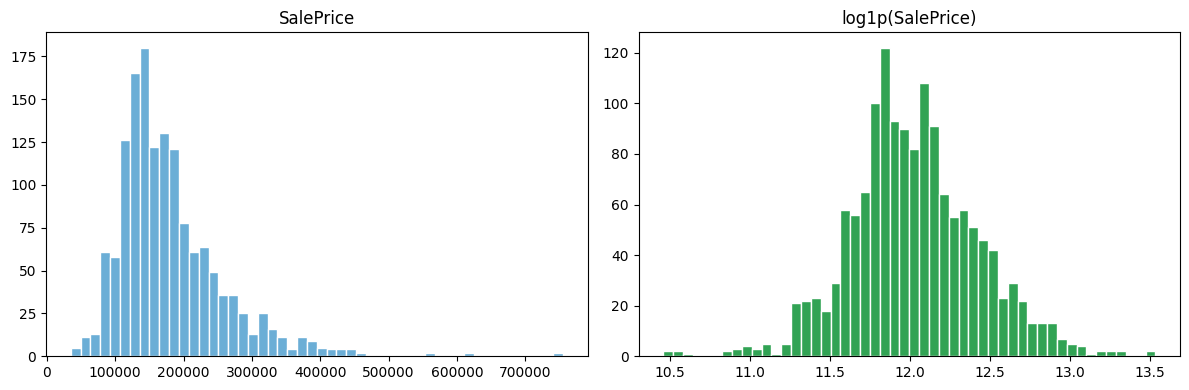

In [6]:
import os
os.makedirs('reports/figures', exist_ok=True)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(train['SalePrice'], bins=50, color='#6baed6', edgecolor='white')
axes[0].set_title('SalePrice')
axes[1].hist(np.log1p(train['SalePrice']), bins=50, color='#31a354', edgecolor='white')
axes[1].set_title('log1p(SalePrice)')
plt.tight_layout()
plt.savefig('reports/figures/target_distribution.png', dpi=150)
plt.show()


## 🔥 Korelasyon Isı Haritası (Sayısal Değişkenler)


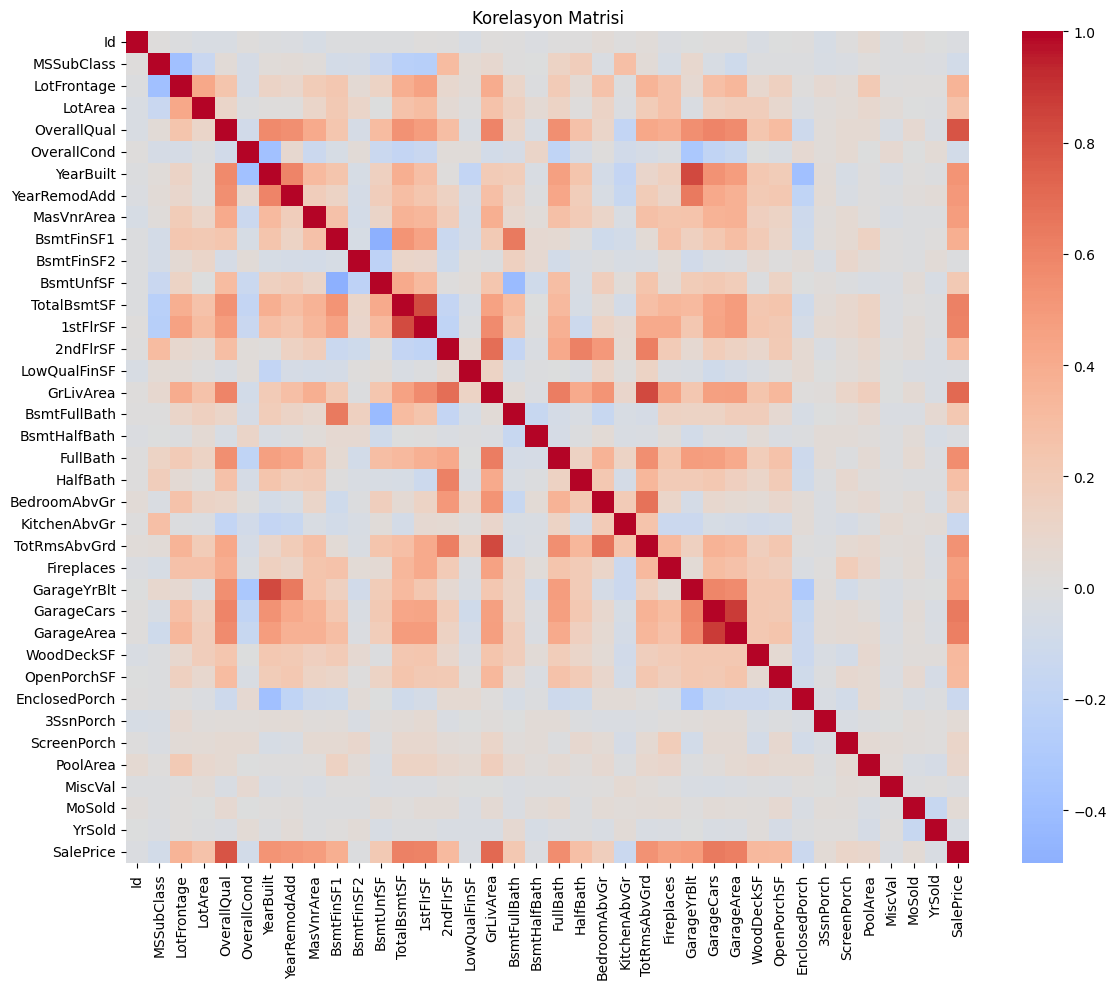

SalePrice ile en yüksek korelasyonlu ilk 10 değişken:
SalePrice      1.000
OverallQual    0.791
GrLivArea      0.709
GarageCars     0.640
GarageArea     0.623
TotalBsmtSF    0.614
1stFlrSF       0.606
FullBath       0.561
TotRmsAbvGrd   0.534
YearBuilt      0.523
Name: SalePrice, dtype: float64


In [7]:
corr = train.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.savefig('reports/figures/correlation_heatmap.png', dpi=150)
plt.show()

print('SalePrice ile en yüksek korelasyonlu ilk 10 değişken:')
print(corr['SalePrice'].sort_values(ascending=False).head(10))


## 🧱 Kategorik Değişkenlerin Hedefe Göre Ortalaması


/var/folders/33/8h6p6yxn489_wbj05dfchhc80000gn/T/ipykernel_28754/1601444808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='SalePrice', data=train, order=order, palette='Blues_d')


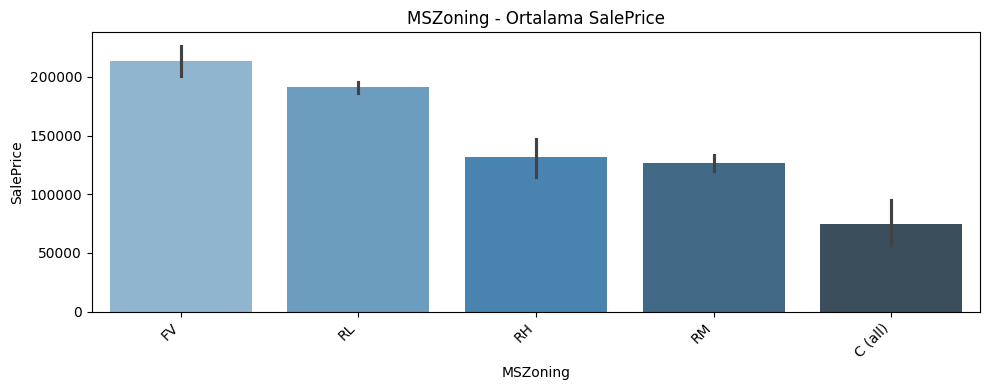

/var/folders/33/8h6p6yxn489_wbj05dfchhc80000gn/T/ipykernel_28754/1601444808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='SalePrice', data=train, order=order, palette='Blues_d')


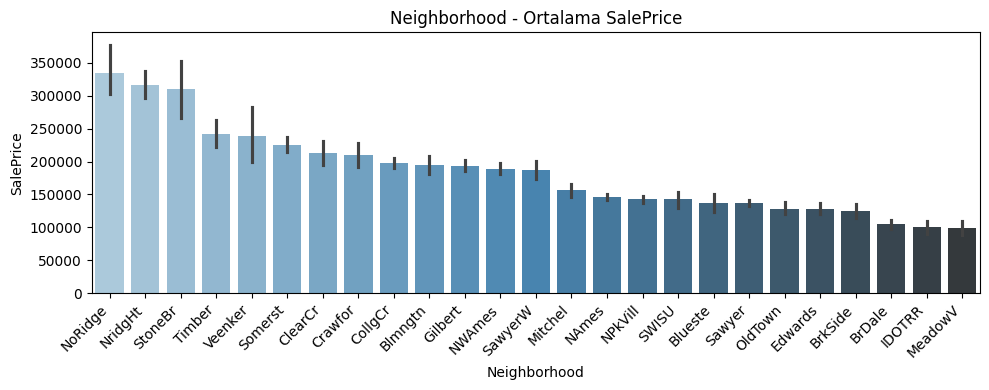

/var/folders/33/8h6p6yxn489_wbj05dfchhc80000gn/T/ipykernel_28754/1601444808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='SalePrice', data=train, order=order, palette='Blues_d')


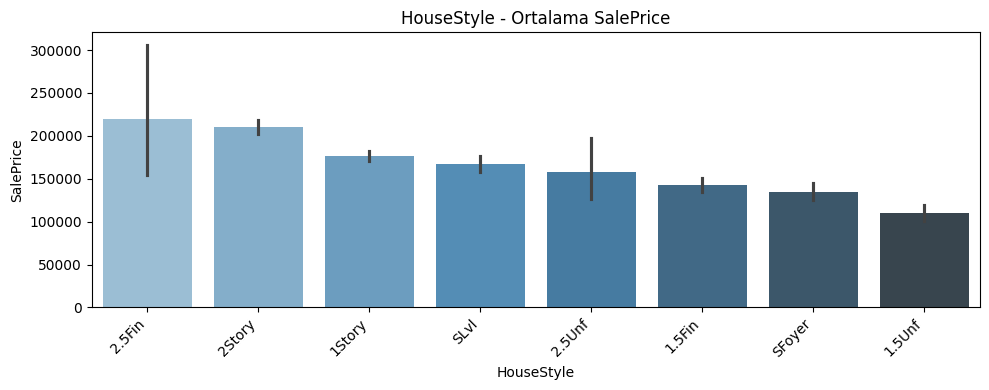

In [8]:
for col in ['MSZoning','Neighborhood','HouseStyle']:
    if col in train.columns:
        order = train.groupby(col)['SalePrice'].mean().sort_values(ascending=False).index
        plt.figure(figsize=(10,4))
        sns.barplot(x=col, y='SalePrice', data=train, order=order, palette='Blues_d')
        plt.title(f'{col} - Ortalama SalePrice')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(f'reports/figures/{col}_target_mean.png', dpi=150)
        plt.show()


## 🧩 Eksik Değer Görselleştirme


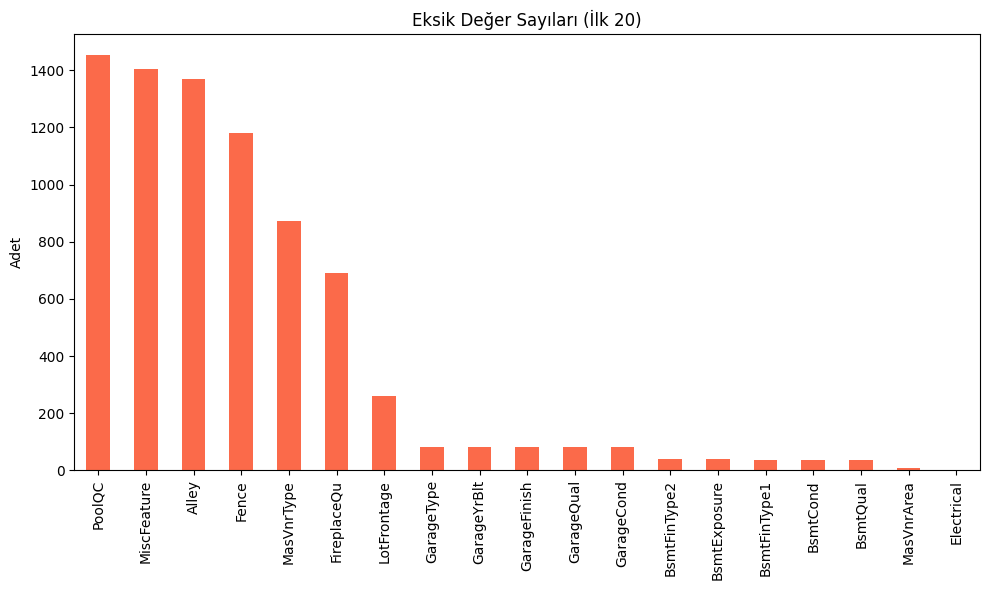

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [9]:
na_counts = train.isnull().sum()
na_counts = na_counts[na_counts>0].sort_values(ascending=False)
plt.figure(figsize=(10,6))
na_counts.head(20).plot(kind='bar', color='#fb6a4a')
plt.title('Eksik Değer Sayıları (İlk 20)')
plt.ylabel('Adet')
plt.tight_layout()
plt.savefig('reports/figures/missing_values.png', dpi=150)
plt.show()
na_counts.head(20)


## 📈 Önemli Sayısal Değişkenler vs Hedef


/var/folders/33/8h6p6yxn489_wbj05dfchhc80000gn/T/ipykernel_28754/2966617377.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='viridis')


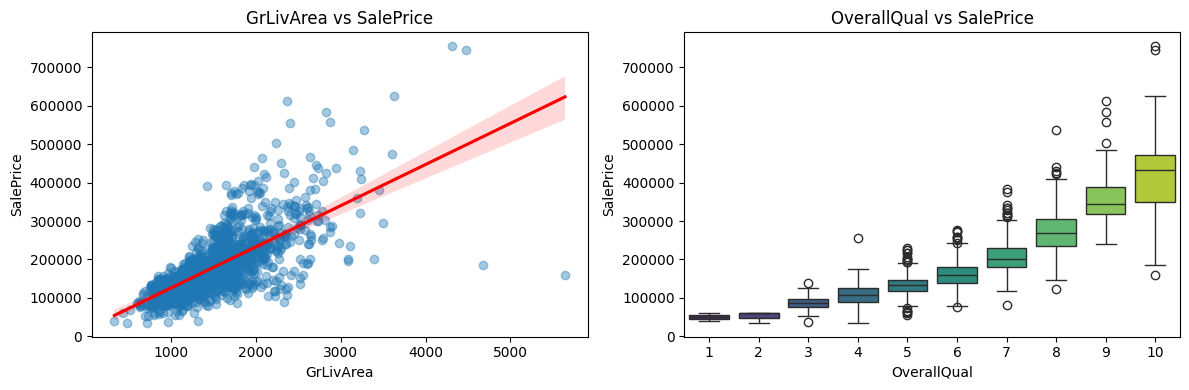

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.regplot(x='GrLivArea', y='SalePrice', data=train, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('GrLivArea vs SalePrice')

plt.subplot(1,2,2)
if 'OverallQual' in train.columns:
    sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='viridis')
    plt.title('OverallQual vs SalePrice')
plt.tight_layout()
plt.savefig('reports/figures/key_numeric_vs_target.png', dpi=150)
plt.show()
